# Naive Methods



## Importación de librerías y datos

Por medio de nuestra libería ESIOS_contoller.py importamos nuestro último dataset de datos y lo parseamos para su uso. Sirve tanto como para Drive como jupiter.

In [0]:
import json, urllib, datetime, pickle, time
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
from keras.optimizers import *
from scipy.stats import *
from importlib.machinery import SourceFileLoader


try:
  from google.colab import drive
  drive.mount('/content/drive')
  path = '/content/drive/My Drive/TFM/01.Utils/ESIOS_contoller.py'
  in_colab = True
except:
  path = '../utils/ESIOS_contoller.py'
  in_colab = False
  

esios_assembler = SourceFileLoader('esios', path).load_module()

esios_controller = esios_assembler.ESIOS(in_colab)
data_consumo = esios_controller.get_data('non-secuencial')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
Mostrando los datos de data_total_for_non_serial.csv
(30555, 34)
________________________________________________________________________________


## Preparación de los datos

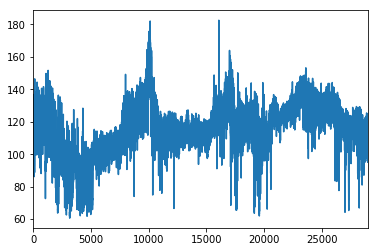

In [0]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

data = data_consumo[['date_timestamp', 'PVPC_DEF']]

train, test = train_test_split(data, test_size=0.05, random_state=0, shuffle=False)
train_short, test_short = train_test_split(data, test_size=0.001, random_state=0, shuffle=False)

train['PVPC_DEF'].plot()
pyplot.show()

In [0]:
print(test_short.shape)
print(train.shape)

(31, 2)
(29027, 2)



## Modelos (diario, mensual...)

In [0]:
from sklearn.metrics import *
from math import sqrt
    
def evaluate_model(model_func, train, test):
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		yhat_sequence = model_func(history)
		predictions.append(yhat_sequence)
		history.append(test[i])
	esios_controller.get_metrics(pd.DataFrame(test), pd.DataFrame(predictions))
	return predictions

def daily_persistence(history):
	return history[-24]
 
def weekly_persistence(history):
	return history[-168]
 
def week_one_year_ago_persistence(history):
	return history[-8760]


In [0]:
models = dict()
models['daily'] = daily_persistence
models['weekly'] = weekly_persistence
models['yearly'] = week_one_year_ago_persistence

predictions = dict()

for name, func in models.items():
	print(name)
	prediction = evaluate_model(func, train.PVPC_DEF.values.tolist(), test.PVPC_DEF.values.tolist())
	predictions[name] = prediction

daily
** --------------- Metrics: --------------- **
MSE:  32.11741079842932
RMSE:  5.667222494170255
MAE:  4.202545811518324
Log_MSE:  0.0026755966978829386
MedianAE:  3.2650000000000006
MAPE:  0    3.841981
dtype: float64 %
SMAPE:  0    3.83075
dtype: float64 %
Variance:  -0.07209411540051658
Max Error:  33.32000000000001
** ---------------------------------------- **
weekly
** --------------- Metrics: --------------- **
MSE:  56.900007460732986
RMSE:  7.543209360791532
MAE:  5.811335078534032
Log_MSE:  0.004655415904726566
MedianAE:  4.550000000000004
MAPE:  0    5.334172
dtype: float64 %
SMAPE:  0    5.272867
dtype: float64 %
Variance:  -0.8946152776877965
Max Error:  35.239999999999995
** ---------------------------------------- **
yearly
** --------------- Metrics: --------------- **
MSE:  225.16015281413613
RMSE:  15.005337477515663
MAE:  13.072558900523559
Log_MSE:  0.016907657518996404
MedianAE:  12.434999999999995
MAPE:  0    12.033908
dtype: float64 %
SMAPE:  0    11.30211
d

### Plot 

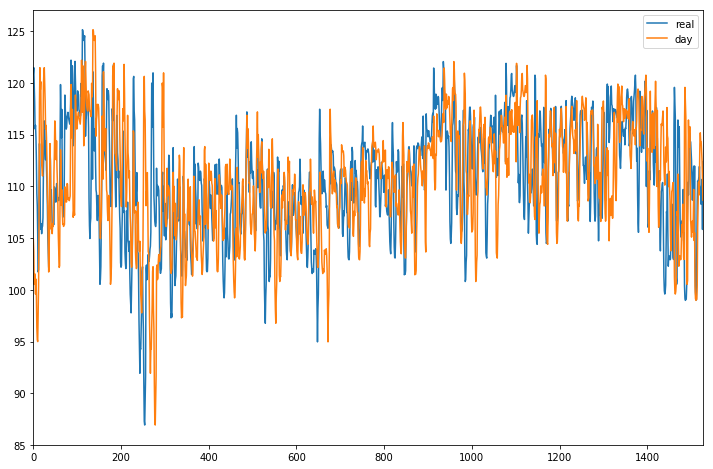

In [0]:
d = {'real':test.PVPC_DEF.values.tolist(),'day':predictions['daily']}
df = pd.DataFrame(d)
df.plot(figsize=(12, 8)) 

## Modelos agrupado diario

In [0]:
def evaluate_model(model_func, train, test):
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		yhat_sequence = model_func(history)
		predictions.append(yhat_sequence)
		history.append(test[i])
	esios_controller.get_metrics(pd.DataFrame(test), pd.DataFrame(predictions))
	return predictions

def daily_persistence(history):
	return history[-1]
 
  
x_data_grouped = esios_controller.get_df_daily()
x_data_grouped = pd.DataFrame(x_data_grouped['PVPC_DEF'])
    
train, test = train_test_split(x_data_grouped, test_size=0.05, random_state=0, shuffle=False)

models = dict()
models['daily'] = daily_persistence

predictions = dict()

for name, func in models.items():
	print(name)
	prediction = evaluate_model(func, train.PVPC_DEF.values.tolist(), test.PVPC_DEF.values.tolist())
	predictions[name] = prediction

daily
** --------------- Metrics: --------------- **
MSE:  9.222561948715121
RMSE:  3.0368671272736187
MAE:  2.353642475696468
Log_MSE:  0.0007334695391456826
MedianAE:  1.837192028985541
MAPE:  0    2.125715
dtype: float64 %
SMAPE:  0    2.118223
dtype: float64 %
Variance:  0.44635265345566744
Max Error:  9.135923913043527
** ---------------------------------------- **


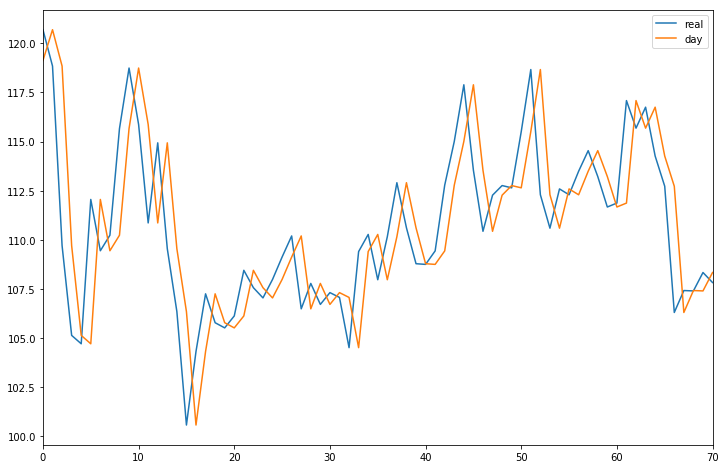

In [0]:
d = {'real':test.PVPC_DEF.values.tolist(),'day':predictions['daily']}
df = pd.DataFrame(d)
df.plot(figsize=(12, 8)) 

### Predict 24h

In [0]:
np.shape(pd.DataFrame(predictions))

(71, 1)

In [0]:
predictions = pd.DataFrame(predictions)
predictions['Holiday'] = esios_controller.get_df_daily()[-71:]['Holiday'].values
np.shape(predictions)

(71, 2)

In [0]:
encoder = esios_controller.load_keras_model('/content/drive/My Drive/TFM/01.Utils/data/Encoder.json')

/content/drive/My Drive/TFM/01.Utils/data/Encoder.json








Loaded model from disk


In [0]:
all_day_real_preds = encoder.predict(predictions);
print(np.shape(all_day_real_preds))

(71, 24)


In [0]:
y_data_target = esios_controller.get_df_daily_target_day_prics()
y_data_target = pd.DataFrame(y_data_target.values.tolist(), columns=['h'+str(i) for i in range(24)])

y_data_target_for_test = y_data_target[-71:]
np.shape(y_data_target_for_test)

(71, 24)

In [0]:
import math
pred = list()
real = list()

day_key = 0
for day in y_data_target_for_test.values:
  hour_key = 0
  for hour in day:
    if not math.isnan(hour) and hour != 0:
      real.append(hour)
      pred.append(all_day_real_preds[day_key][hour_key])
    hour_key += 1 
  day_key += 1  
  
  
print(np.shape(pred))
print(np.shape(real)) 

(1627,)
(1627,)


In [0]:
pred_temp = pd.DataFrame(real)
pred_temp.tail()

,0
1622,108.27
1623,109.20
1624,110.68
1625,105.84
1626,112.39


In [0]:
pred_temp[pred_temp[0] < 10]

,0


### Métricas

In [0]:
esios_controller.get_metrics(pd.DataFrame(real), pd.DataFrame(pred))

** --------------- Metrics: --------------- **
MSE:  40.431793131371144
RMSE:  6.3585999348418785
MAE:  4.8941537006661875
Log_MSE:  0.003285905147105437
MedianAE:  3.885785827636724
MAPE:  0    4.484696
dtype: float64 %
SMAPE:  0    4.432816
dtype: float64 %
Variance:  -0.27163112119762856
Max Error:  24.84501190185547
** ---------------------------------------- **


### Plot

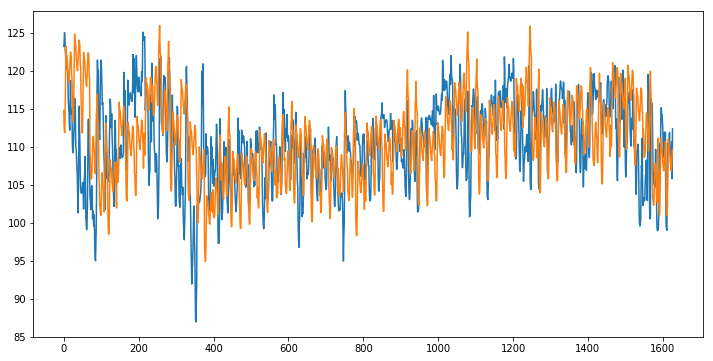

In [0]:
plt.figure(figsize=(12, 6))
last_non_0 = np.shape(pred)[0] - 24

plt.plot(real[:last_non_0], label='real data')
plt.plot(pred[:last_non_0], label='pred data') 

## Resultados

### Persistencia diaria

MSE:  32.11741079842932

RMSE:  5.667222494170255

MAPE:  3.841981 %

SMAPE:  3.83075 %

**MEJOR RESULTADO !**

### Persistencia diaria agrupada 
MSE:  209.82817090076938

RMSE:  14.485446865760455

MAPE:  0    inf

SMAPE:  0    7.275706